Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\prasa\OneDrive\Desktop\resume_screener_project\UpdatedResumeDataSet.csv')


In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


Data Preprocessing

In [6]:
df.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [7]:
df.Category.nunique()

25

C:\Users\prasa\AppData\Local\Temp\ipykernel_16828\25182385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Category', edgecolor = 'black', palette = 'cubehelix')


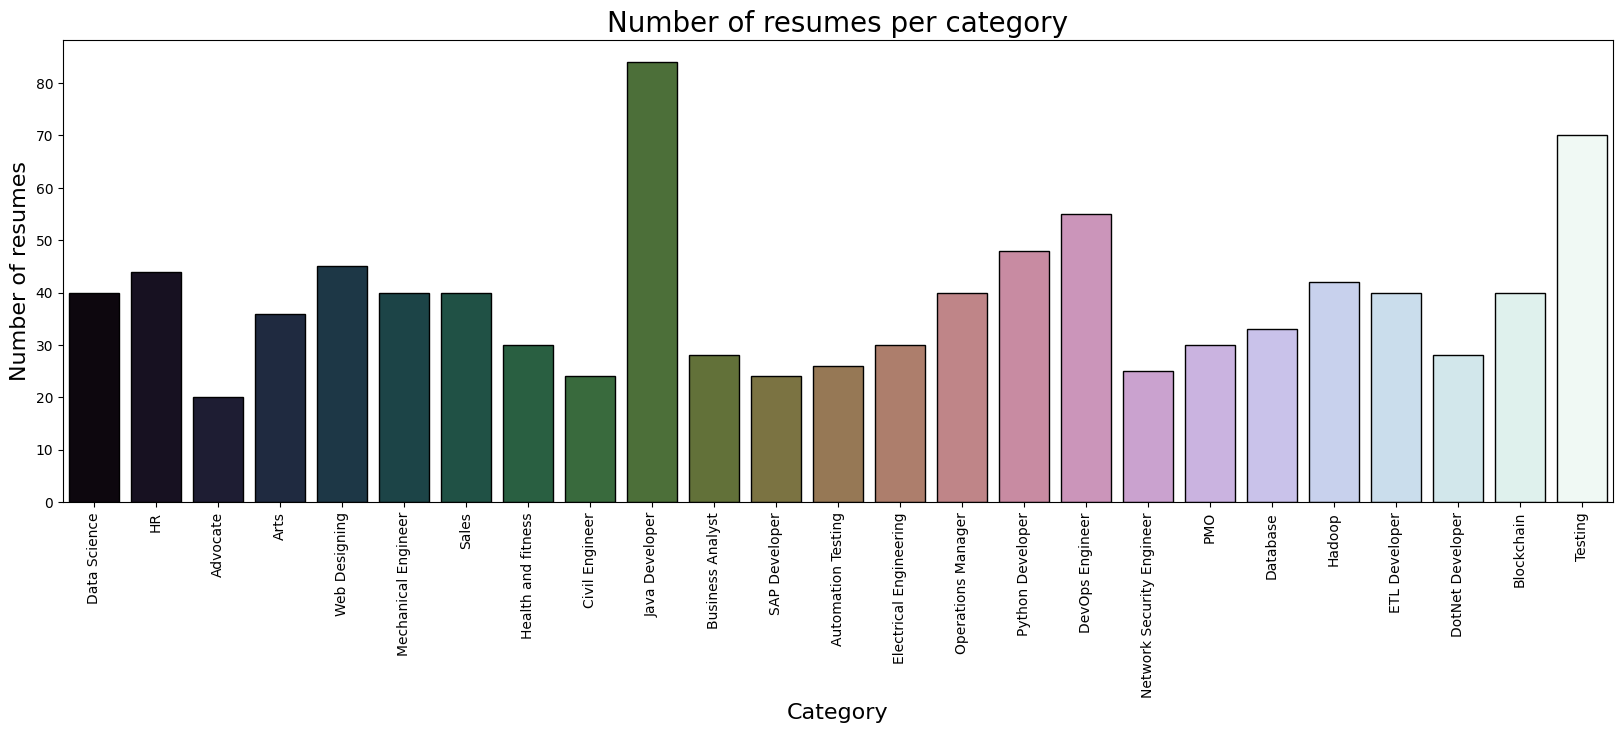

In [8]:
plt.figure(figsize = (20,6))
sns.countplot(data = df, x = 'Category', edgecolor = 'black', palette = 'cubehelix')
plt.xticks(rotation = 90)
plt.title('Number of resumes per category', fontsize = 20)
plt.xlabel('Category', fontsize = 16)
plt.ylabel('Number of resumes', fontsize = 16)
plt.show()

In [9]:
counts = df.Category.value_counts()
labels = df.Category.unique()
     

In [10]:
labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
counts

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

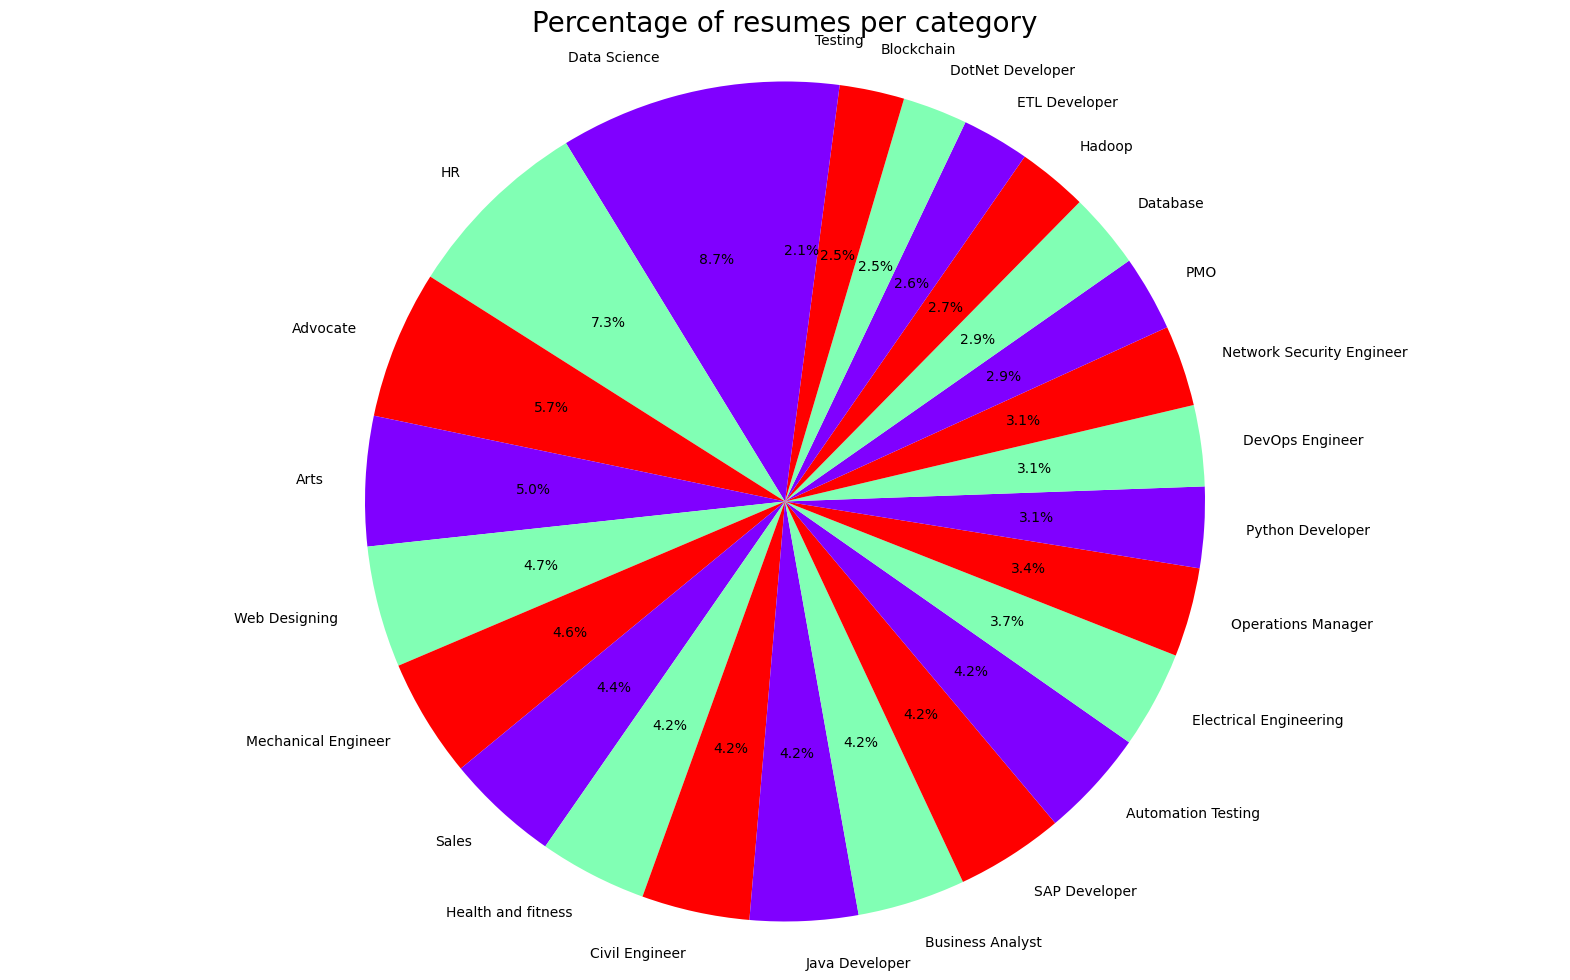

In [12]:
plt.figure(figsize = (20,12))
plt.pie(counts, labels = labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.rainbow(np.linspace(0,1,3)))
plt.title('Percentage of resumes per category', fontsize = 20)
plt.axis('equal')
plt.show()

In [13]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Text processing

In [14]:
import os
print(os.getcwd())



c:\Users\prasa\OneDrive\Desktop\resume_screener_project


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
def cleaning_text(text):
    text = re.sub(r'[^\w\s]', '', text)       
    text = text.lower()                      
    words = text.split()                     
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]      
    return ' '.join(words)

In [20]:
df['resume_cleaned'] = df['Resume'].apply(cleaning_text)

In [21]:
df.head()

,Category,Resume,resume_cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 uitrgpv dat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â r â python â sap hana â tableau â sap ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [22]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [23]:
df.head()

,Category,Resume,resume_cleaned
0,6,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 uitrgpv dat...
2,6,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â r â python â sap hana â tableau â sap ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [24]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

train_test_split

In [26]:
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['resume_cleaned'], df['Category'], test_size=0.2, random_state=23
)

TF-IDF Vectorization

In [46]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)


Train KNN Classifier

In [47]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

Evaluate Train & Test Accuracy

In [48]:
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print("\nClassification Report on Test Set:\n")
print(classification_report(y_test, test_preds))


Train Accuracy: 0.9883
Test Accuracy:  0.9845

Classification Report on Test Set:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         4
          12       1.00      0.60      0.75         5
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        1

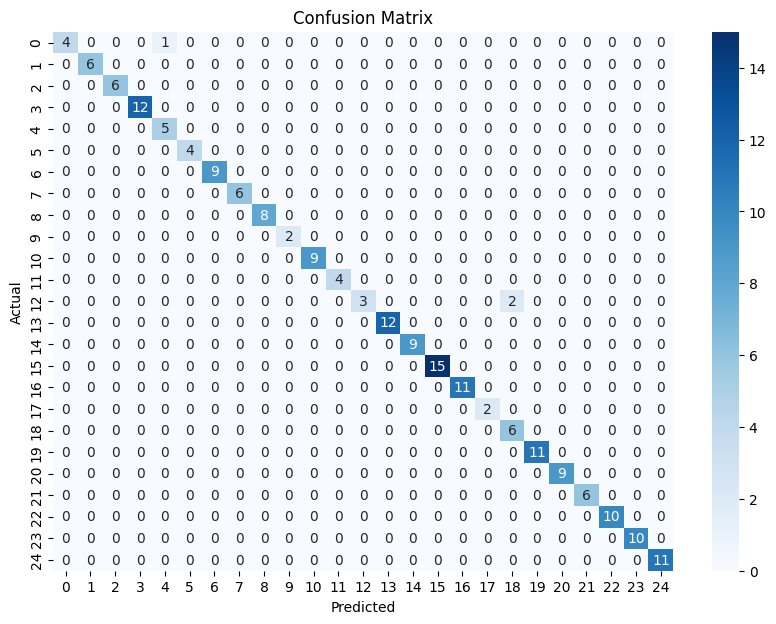

In [51]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Save figure as PNG
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [52]:
scores = cross_val_score(clf, tfidf.transform(df['resume_cleaned']), df['Category'], cv=5)
print("\n5-Fold Cross-Validation Scores:", np.round(scores, 4))
print("Mean CV Accuracy:", np.mean(scores).round(4))
print("Standard Deviation:", np.std(scores).round(4))


5-Fold Cross-Validation Scores: [0.9741 1.     0.9948 1.     0.9948]
Mean CV Accuracy: 0.9927
Standard Deviation: 0.0096


 Save Pickle Files

In [53]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))     
pickle.dump(le, open('label_encoder.pkl', 'wb'))  

Model Testing

In [54]:
myresume="skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  naã ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch  js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular   logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details     data science assurance associate     data science assurance associate   ernst   young llp  skill details   javascript  exprience    months  jquery  exprience    months  python  exprience    monthscompany details   company   ernst   young llp  description   fraud investigations and dispute services   assurance  technology assisted review  tar  technology assisted review  assists in accelerating the review process and run analytics and generate reports     core member of a team helped in developing automated review platform tool from scratch for assisting e discovery domain  this tool implements predictive coding and topic modelling by automating reviews  resulting in reduced labor costs and time spent during the lawyers review     understand the end to end flow of the solution  doing research and development for classification models  predictive analysis and mining of the information present in text data  worked on analyzing the outputs and precision monitoring for the entire tool     tar assists in predictive coding  topic modelling from the evidence by following ey standards  developed the classifier models in order to identify  red flags  and fraud related issues     tools   technologies  python  scikit learn  tfidf      cosine similarity  naã ve bayes  lda  nmf for topic modelling  vader and text blob for sentiment analysis  matplot lib  tableau dashboard for reporting     multiple data science and analytic projects  usa clients   text analytics   motor vehicle customer review data   received customer feedback survey data for past one year  performed sentiment  positive  negative   neutral  and time series analysis on customer comments across all  categories     created heat map of terms by survey category based on frequency of words   extracted positive and negative words across all the survey categories and plotted word cloud     created customized tableau dashboards for effective reporting and visualizations   chatbot   developed a user friendly chatbot for one of our products which handle simple questions about hours of operation  reservation options and so on     this chat bot serves entire product related questions  giving overview of tool via qa platform and also give recommendation responses so that user question to build chain of relevant answer     this too has intelligence to build the pipeline of questions as per user requirement and asks the relevant  recommended questions     tools   technologies  python  natural language processing  nltk  spacy  topic modelling  sentiment analysis  word embedding  scikit learn  javascript jquery  sqlserver    information governance  organizations to make informed decisions about all of the information they store  the integrated information governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk     scan data from multiple sources of formats and parse different file formats  extract meta data information  push results for indexing elastic search and created customized  interactive dashboards using kibana     preforming rot analysis on the data which give information of data which helps identify content that is either redundant  outdated  or trivial     preforming full text search analysis on elastic search with predefined methods which can tag as  pii  personally identifiable information  social security numbers  addresses  names  etc   which frequently targeted during cyber attacks   tools   technologies  python  flask  elastic search  kibana    fraud analytic platform  fraud analytics and investigative platform to review all red flag cases   â   fap is a fraud analytics and investigative platform with inbuilt case manager and suite of analytics for various erp systems     it can be used by clients to interrogate their accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics  tools   technologies  html  javascript  sqlserver  jquery  css  bootstrap  node js   js  dc js'"

     

In [55]:
tfidf = pickle.load(open('tfidf.pkl', 'rb'))
clf = pickle.load(open('clf.pkl', 'rb'))
le = pickle.load(open('label_encoder.pkl', 'rb'))

In [56]:
category_mapping = {
    6:'Data Science',
    12: 'HR',
    0:'Advocate',
    1:'Arts',
    24:'Web Designing',
    16:'Mechanical Engineer',
    22:'Sales',
    14:'Health and fitness',
    5:'Civil Engineer',
    15:'Java Developer',
    4:'Business Analyst',
    21:'SAP Developer',
    2:'Automation Testing',
    11:'Electrical Engineering',
    18:'Operations Manager',
    20:'Python Developer',
    8:'DevOps Engineer',
    17:'Network Security Engineer',
    19:'PMO',
    7:'Database',
    13:'Hadoop',
    10:'ETL Developer',
    9:'DotNet Developer',
    3:'Blockchain',
    23:'Testing'
}

In [57]:
cleaned_resume = cleaning_text(myresume)
inputs = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(inputs)[0]
category_pred = category_mapping.get(prediction_id, 'unknown')

print(f"The ID of prediction is {prediction_id}")
print(f"The predicted category is {category_pred}")


The ID of prediction is 6
The predicted category is Data Science
